<a href="https://colab.research.google.com/github/sergiobcarolo/Academic-Performance-Analysis/blob/main/AcademicPerformanceAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Isto está formatado como código
```

Sérgio Barbosa Carolo

https://www.kaggle.com/datasets/whenamancodes/student-performance/data


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


Carregar e verificar a integridade do banco de dados:


In [3]:
from google.colab import files
uploaded=files.upload()

Saving Maths.csv to Maths.csv


In [4]:
#stpf = arquivo study_performance.csv
stpf = pd.read_excel('Maths.csv')

In [5]:
print(stpf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      397 non-null    object
 1   sex         397 non-null    object
 2   age         397 non-null    int64 
 3   address     397 non-null    object
 4   famsize     397 non-null    object
 5   Pstatus     397 non-null    object
 6   Medu        397 non-null    int64 
 7   Fedu        397 non-null    int64 
 8   Mjob        397 non-null    object
 9   Fjob        397 non-null    object
 10  reason      397 non-null    object
 11  guardian    397 non-null    object
 12  traveltime  397 non-null    int64 
 13  studytime   397 non-null    int64 
 14  failures    397 non-null    int64 
 15  schoolsup   397 non-null    object
 16  famsup      397 non-null    object
 17  paid        397 non-null    object
 18  activities  397 non-null    object
 19  nursery     397 non-null    object
 20  higher    

In [6]:
stpf.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
print(stpf.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Plotar gráficos de barras e histogramas para percepções iniciais:


               G1         G2         G3
school                                 
GP      10.922857  10.768571  10.477143
MS      10.574468  10.085106   9.638298


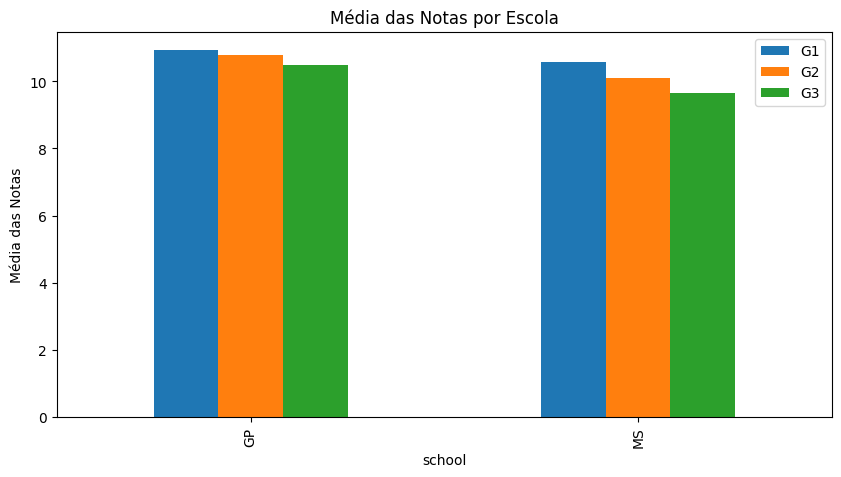

In [8]:
media_escola = stpf.groupby('school')[['G1', 'G2', 'G3']].mean()
print(media_escola)

# Plotar comparações
media_escola.plot(kind='bar', figsize=(10, 5))
plt.title('Média das Notas por Escola')
plt.ylabel('Média das Notas')
plt.show()

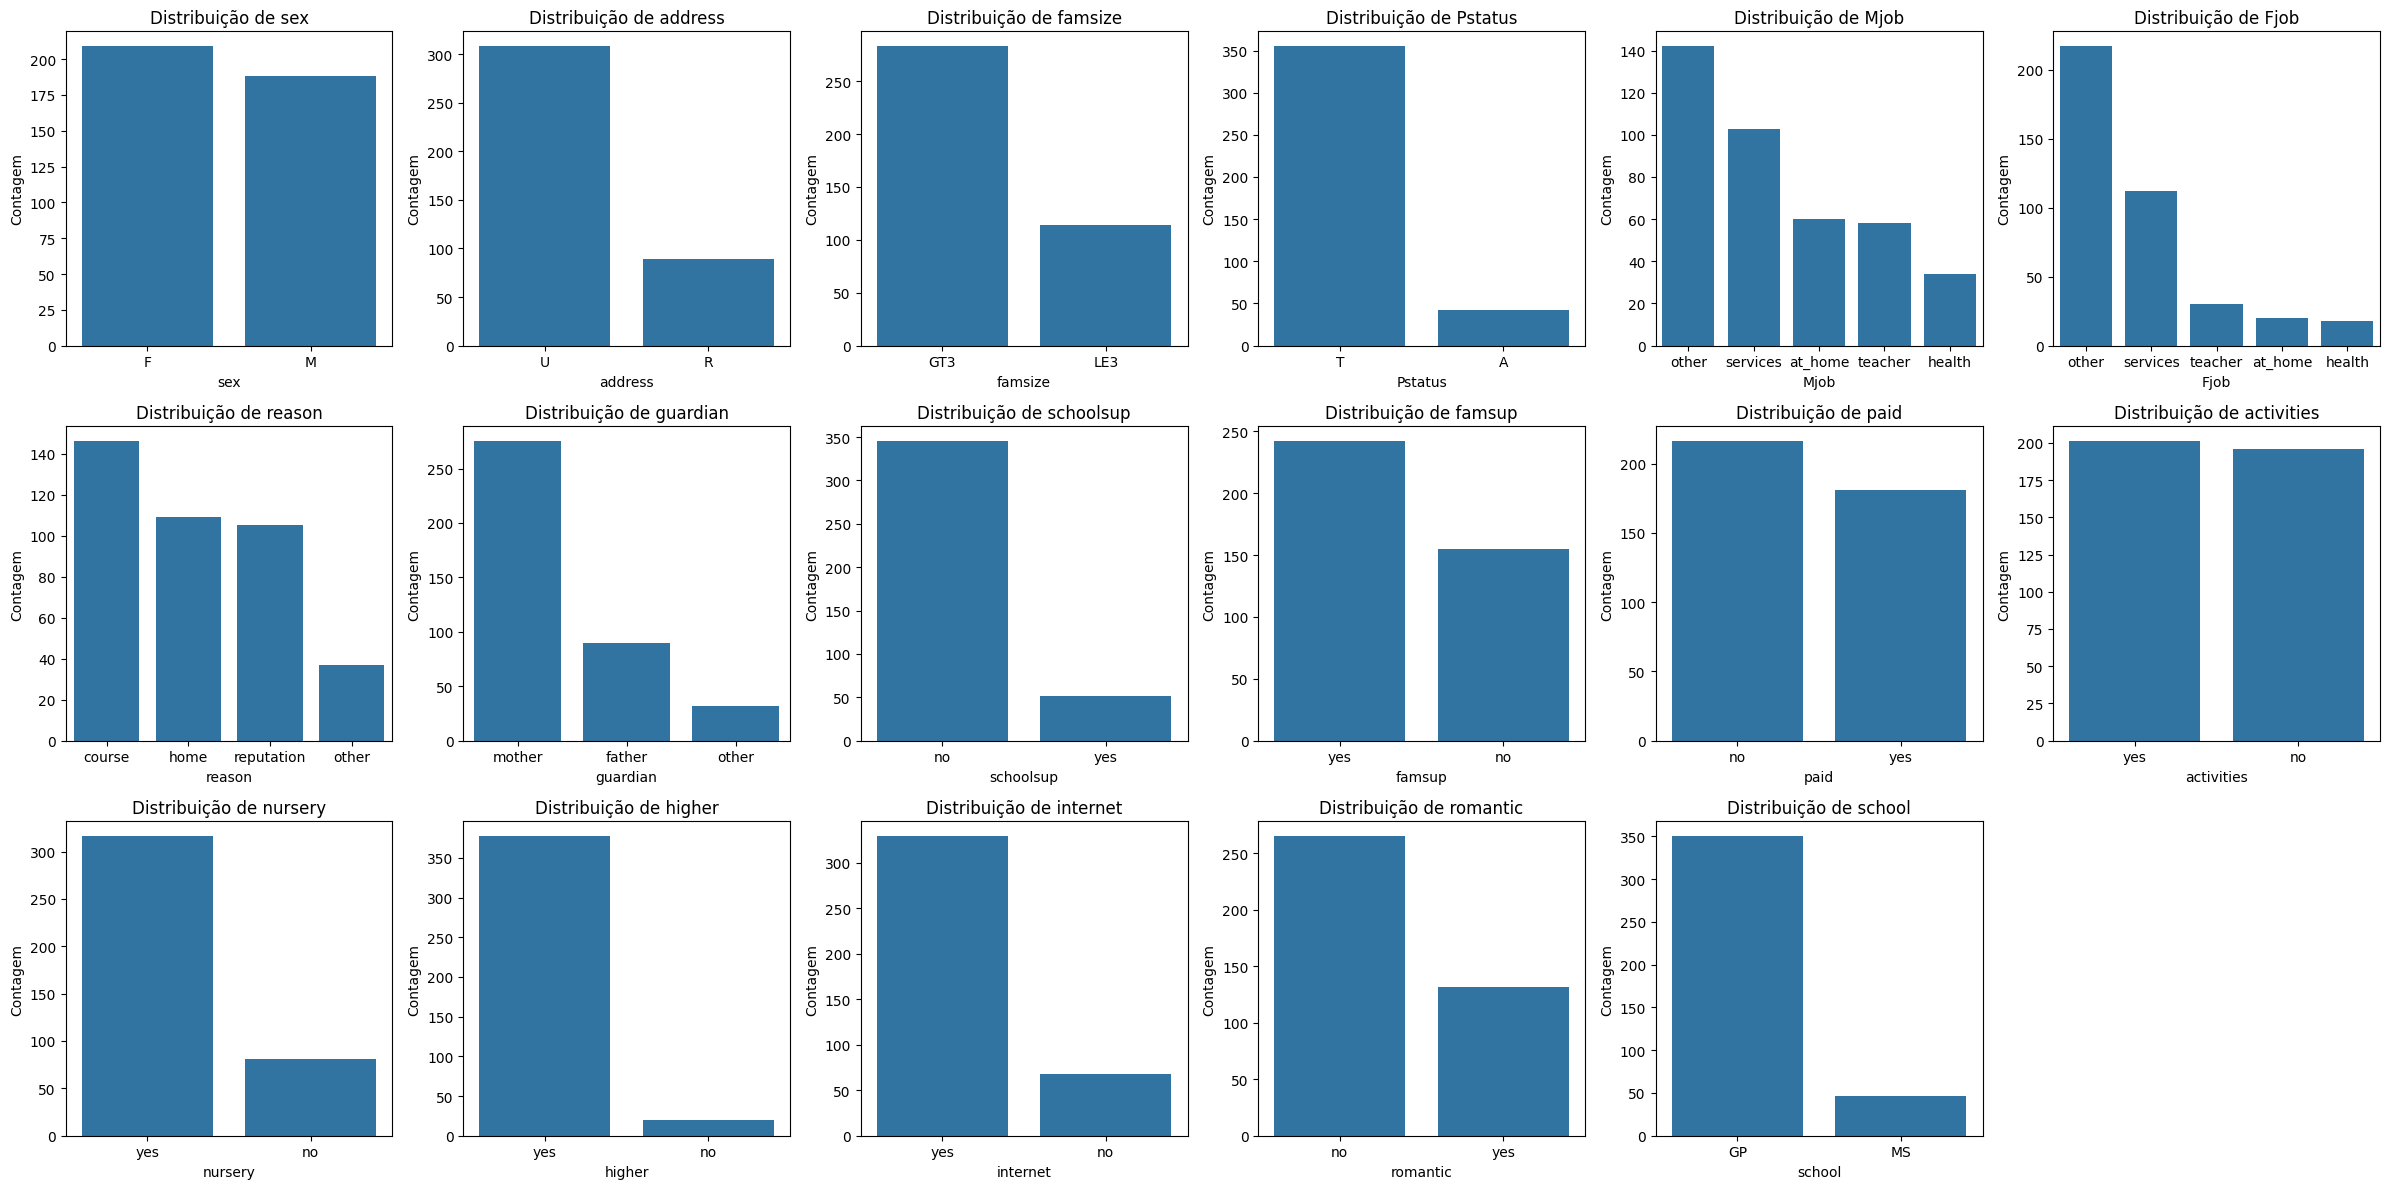

In [9]:
# Criar uma lista de variáveis categóricas para plotar
variaveis_categoricas = ['sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                    'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher', 'internet',
                    'romantic', 'school']

# Calcular as contagens de cada categoria para cada variável categórica
cat_counts = {var: stpf[var].value_counts() for var in variaveis_categoricas}

# Definir a disposição dos subplots (3x6)
fig, axes = plt.subplots(3, 6, figsize=(24, 12))


# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotar gráficos de barra para cada variável categórica
for i, var in enumerate(variaveis_categoricas):
    sns.barplot(x=cat_counts[var].index, y=cat_counts[var].values, ax=axes[i])
    axes[i].set_title(f'Distribuição de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Contagem')

# Remover o último subplot vazio
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()


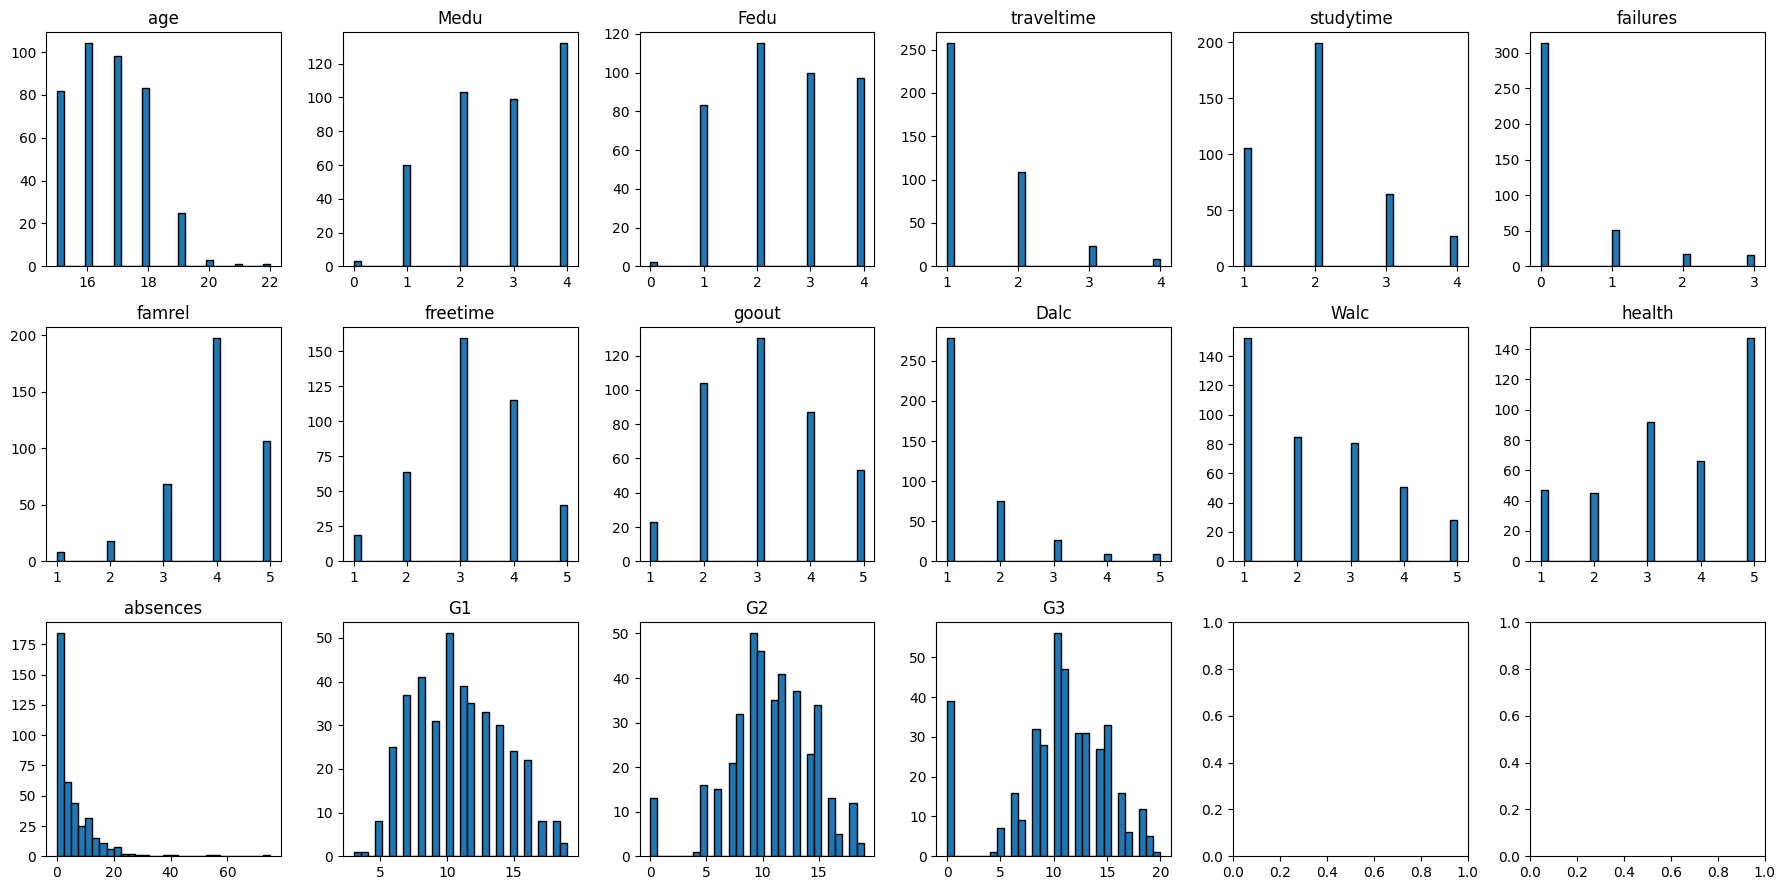

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,16.705290,2.748111,2.521411,1.450882,2.032746,0.335013,3.944584,3.234257,3.108312,1.478589,2.289673,3.556675,5.695214,10.881612,10.687657,10.377834
std,1.279716,1.097301,1.090672,0.696840,0.838731,0.742714,0.894400,0.996476,1.112762,0.889143,1.286770,1.388967,7.988015,3.333120,3.770322,4.604928
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
# Selecionar variáveis numéricas
numeric_cols = stpf.select_dtypes(include=[np.number]).columns

# Configurar o tamanho da figura para 3 linhas e 6 colunas
fig, axes = plt.subplots(3, 6, figsize=(18, 9))
axes = axes.flatten()  # Flatten para iterar facilmente

# Iterar sobre cada coluna numérica e plotar o histograma
for i, col in enumerate(numeric_cols):
    if i < 16:  # Garantir a plotagem até 16 variáveis
        axes[i].hist(stpf[col], bins=30, edgecolor='black')
        axes[i].set_title(col)
    else:
        axes[i].axis('off')  # Desligar eixos dos gráficos extras

# Ajustar layout para evitar sobreposição de títulos
plt.tight_layout()
plt.show()
# Calcular medidas resumo para cada variável numérica
stpf.describe()

Calcular as correlações das variáveis numéricas:


In [11]:
variaveis_numericas = stpf.select_dtypes(include=['int64', 'float64'])
correlação_variaveisnum = variaveis_numericas.corr()
print(correlação_variaveisnum['G3'])


age          -0.172175
Medu          0.220783
Fedu          0.155256
traveltime   -0.122475
studytime     0.104015
failures     -0.361237
famrel        0.050468
freetime      0.013131
goout        -0.127760
Dalc         -0.049826
Walc         -0.052185
health       -0.065737
absences      0.037944
G1            0.802676
G2            0.905238
G3            1.000000
Name: G3, dtype: float64


In [ ]:
Plotas métodos de regressões para compreender melhor a tendência dos dados:

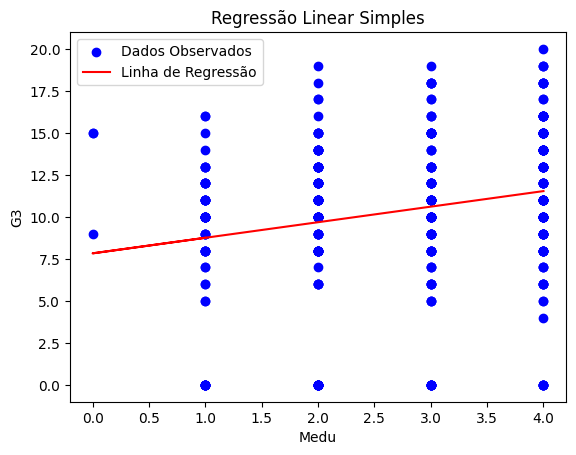

R2: 0.04874515296507431
Erro quadrático médio: 20.120896847543726


In [13]:

# Variáveis independentes e dependentes
X = stpf['Medu'].values.reshape(-1, 1)  # Transforma a variável independente em uma matriz 2D
y = stpf['G3']

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Plotar os pontos de dados
plt.scatter(X, y, color='blue', label='Dados Observados')

# Plotar a linha de regressão
plt.plot(X, y_pred, color='red', label='Linha de Regressão')

# Adicionar rótulos e título
plt.xlabel('Medu')
plt.ylabel('G3')
plt.title('Regressão Linear Simples')
plt.legend()

# Exibir o gráfico
plt.show()
print('R2:', r2)
print('Erro quadrático médio:', mse)

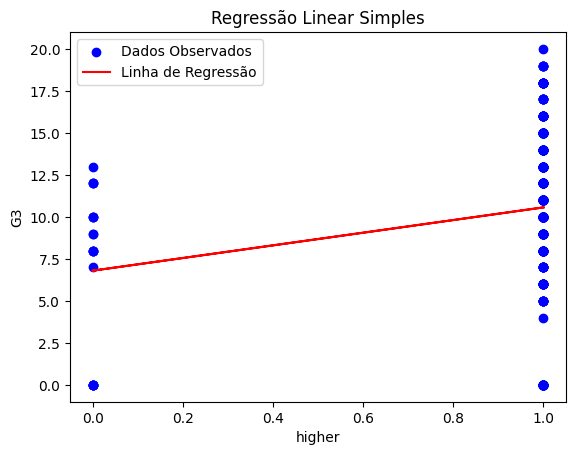

R2: 0.03210543120701759
Erro quadrático médio: 20.472859443171263


In [14]:
from sklearn.preprocessing import LabelEncoder

# Cria um objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicar a codificação de rótulos à variável escolhida
stpf['higher_encoded'] = label_encoder.fit_transform(stpf['higher'])

# Variáveis independentes e dependentes
X = stpf['higher_encoded'].values.reshape(-1, 1)  # Transforma a variável independente em uma matriz 2D
y = stpf['G3']

# Instanciar e treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X, y)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Plotar os pontos de dados
plt.scatter(X, y, color='blue', label='Dados Observados')

# Plotar a linha de regressão
plt.plot(X, y_pred, color='red', label='Linha de Regressão')


# Adicionar rótulos e título
plt.xlabel('higher')
plt.ylabel('G3')
plt.title('Regressão Linear Simples')
plt.legend()

# Exibir o gráfico
plt.show()
print('R2:', r2)
print('Erro quadrático médio:', mse)

Mean Squared Error: 21.294931752650836
R-squared: -0.057025347787376335


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


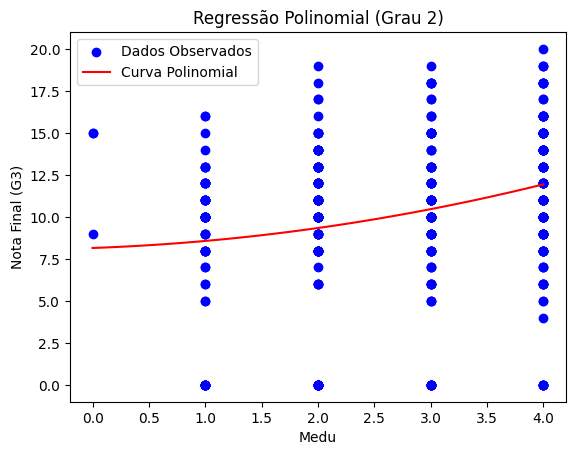

In [15]:

from sklearn.preprocessing import PolynomialFeatures
# Selecionar variáveis independentes e dependente
X = stpf[['Medu']]
y = stpf['G3']

# Transformar a variável independente em termos polinomiais de grau 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Treinar o modelo de regressão linear nos dados transformados
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualizar a parábola ajustada
plt.scatter(X['Medu'], y, color='blue', label='Dados Observados')

# Gerar pontos para a curva polinomial
X_curve = np.linspace(X['Medu'].min(), X['Medu'].max(), 100).reshape(-1, 1)
X_curve_poly = poly.transform(X_curve)
y_curve = model.predict(X_curve_poly)

plt.plot(X_curve, y_curve, color='red', label='Curva Polinomial')

# Adicionar rótulos e título
plt.xlabel('Medu')
plt.ylabel('Nota Final (G3)')
plt.title('Regressão Polinomial (Grau 2)')
plt.legend()

# Exibir o gráfico
plt.show()


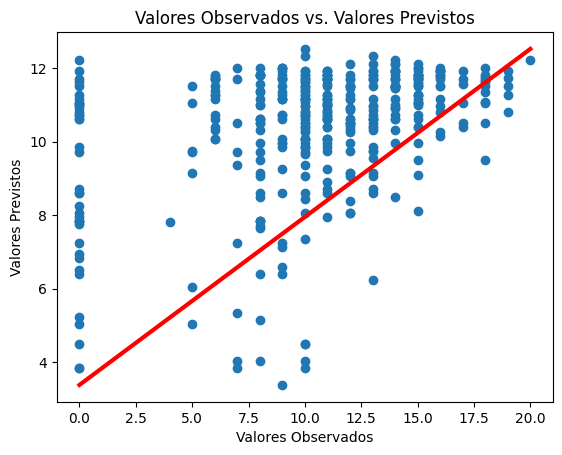

R2: 0.15129604710124667
Erro quadrático médio: 17.951745259019372


In [16]:
# Selecionar variáveis independentes e resposta
X = stpf[['Fedu', 'Medu', 'failures', 'studytime']]  # Variáveis independentes
y = stpf['G3']  # Variável de resposta

# Instanciar e treinar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X, y)

# Fazer previsões usando o modelo treinado
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# Plotar os valores observados vs os valores previstos
plt.scatter(y, y_pred)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Previstos')
plt.title('Valores Observados vs. Valores Previstos')
# Adicionar a linha de regressão
plt.plot([y.min(), y.max()], [y_pred.min(), y_pred.max()], color='red', linewidth=3)
plt.show()
print('R2:', r2)
print('Erro quadrático médio:', mse)


O método de regressão linear múltipla sugeriu que analisar um conjunto de variáveis pode ser um melhor caminho, logo foi feito uma matriz de calor para ver o cenário como um todo:

school           -0.065858
sex               0.104678
age              -0.174501
address           0.121218
famsize           0.081616
Pstatus          -0.046831
Medu              0.223695
Fedu              0.161435
Mjob              0.107917
Fjob              0.039015
reason            0.115006
guardian         -0.073388
traveltime       -0.124056
studytime         0.112797
failures         -0.358819
schoolsup        -0.121912
famsup           -0.036017
paid              0.088045
activities        0.032692
nursery           0.044732
higher            0.172068
internet          0.120530
romantic         -0.113917
famrel            0.050172
freetime          0.007285
goout            -0.142928
Dalc             -0.069707
Walc             -0.079968
health           -0.071478
absences          0.004038
G1                0.852252
G2                0.939786
G3                1.000000
higher_encoded    0.172068
Name: G3, dtype: float64


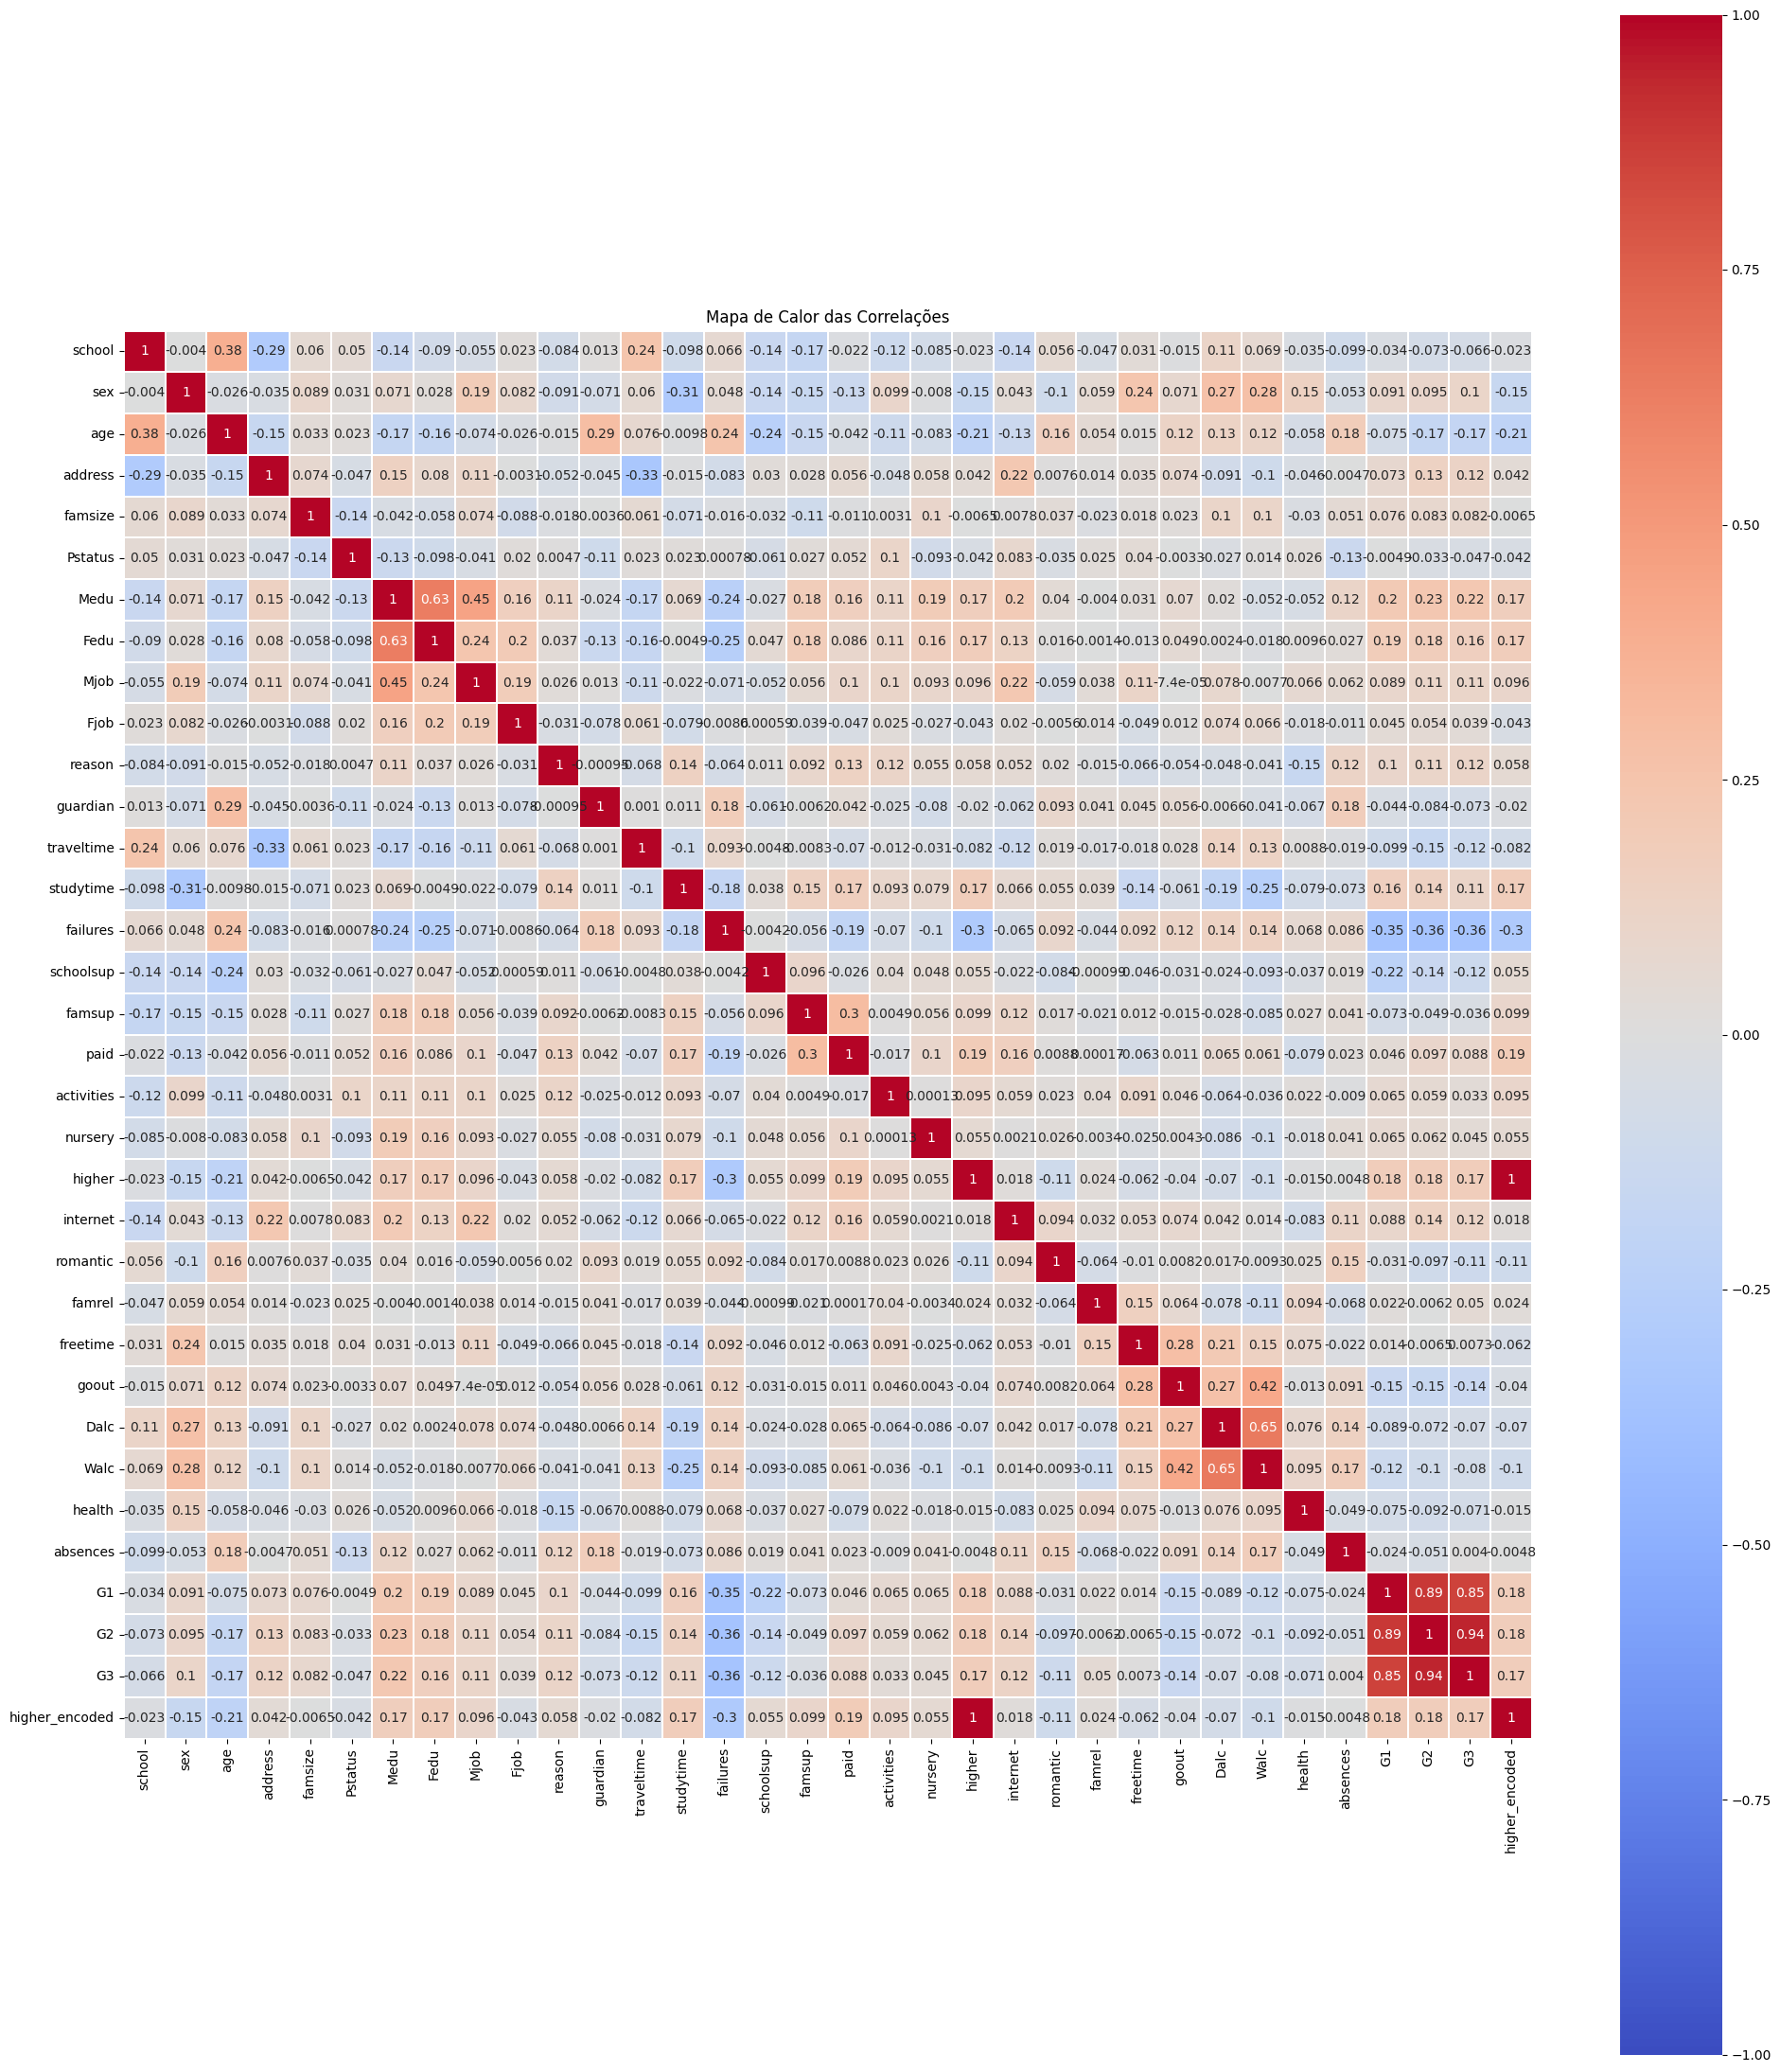

In [17]:
# Aplica o Label Encoding para converter as variáveis não numéricas em valores numéricos
stpf_encoded2 = stpf.apply(label_encoder.fit_transform)

# Calcula a correlação entre as variáveis numéricas incluindo as que foram convertidas
correlation_matrix_encoded = stpf_encoded2.corr()

# Exibe a matriz de correlação
print(correlation_matrix_encoded['G3'])

# Plotar mapa de calor de correlações
plt.figure(figsize=(24, 28))
sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
)
sns.heatmap(
    correlation_matrix_encoded,
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.01,
    annot=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

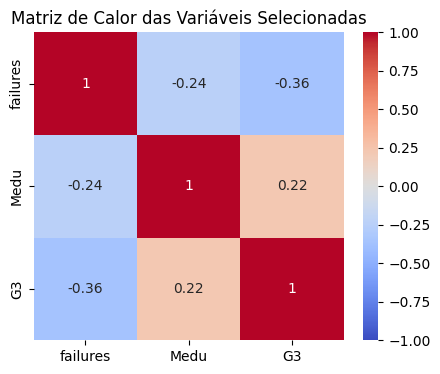

In [18]:
#Selecionar as variáveis específicas
sel_col = ['failures', 'Medu',  'G3']  # Substitua pelas variáveis que você escolher

# Criar um DataFrame apenas com as variáveis selecionadas
selected_data = stpf[sel_col]

# Calcular a matriz de correlação
correlation_matrix = selected_data.corr()

# Criar a matriz de calor
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Calor das Variáveis Selecionadas')
plt.show()

Infere-se que as análises das correlações no conjunto de dados dos alunos destacam a importância de uma abordagem holística para o sucesso acadêmico, que considere não apenas os fatores acadêmicos e socioeconômicos, mas também o bem-estar psicológico dos alunos. Fatores como estresse e falta de motivação são componentes críticos que podem afetar significativamente o desempenho escolar. Intervenções que abordem esses aspectos psicológicos, além dos desafios acadêmicos, são essenciais para promover um ambiente educacional mais saudável e produtivo.